In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import os
%matplotlib inline

In [2]:
def DataPro(data):
    lines=data.splitlines()
    TimeList=[float(lines[i].split()[0]) for i in range(len(lines)-1)]
    DataList=[float(lines[i].split()[1]) for i in range(len(lines)-1)]
    return TimeList,DataList

## Choose file

In [163]:
folder='./FFTdata/04_data/'
Files=os.listdir(folder)
FileList=[os.path.join(folder,Files[i]) for i in range(len(Files))]
for i,name in enumerate(FileList):
    print(str(i)+'. '+name)
try:
    ChosenFile=int(input('Which One Do you Want to Use?\n'))
    with open(FileList[ChosenFile]) as f:
        data1=f.read()
except:
    print('Wrong Input!!Please input Integer.')
    
try:
    ChosenFile=int(input('Which One Do you Want to Use?\n'))
    with open(FileList[ChosenFile]) as f:
        data2=f.read()
except:
    print('Wrong Input!!Please input Integer.')

0. ./FFTdata/04_data/GH@22uF_4s2018-02-03-23-41-25.xls
1. ./FFTdata/04_data/GH@22uF_4s2018-02-03-23-41-25.txt
2. ./FFTdata/04_data/GH@22uF_4s2018-02-03-23-42-07.txt
3. ./FFTdata/04_data/GH@22uF_4s2018-02-03-23-41-46.xls
4. ./FFTdata/04_data/GH@22uF_4s2018-02-03-23-42-07.xls
5. ./FFTdata/04_data/GH@22uF_4s2018-02-03-23-41-46.txt
Which One Do you Want to Use?
0
Which One Do you Want to Use?
3


In [142]:
result=DataPro(data1)
TimeList,DataList=np.array(result[0]),np.array(result[1])

## Data Statistic

In [143]:
Mean=np.mean(DataList)
Std=np.std(DataList)
PpV=np.amax(DataList)-np.amin(DataList)
print('Mean value is ',Mean)
print('STD value is ',Std)
print('Peak-Peak value is ',PpV)
print('Noise-to-Signal ratio is ',Std/Mean*(10**6),' ppm')

Mean value is  9.55153525467
STD value is  0.000113280880395
Peak-Peak value is  0.00063351
Noise-to-Signal ratio is  11.8599656887  ppm


## Plot FFT result

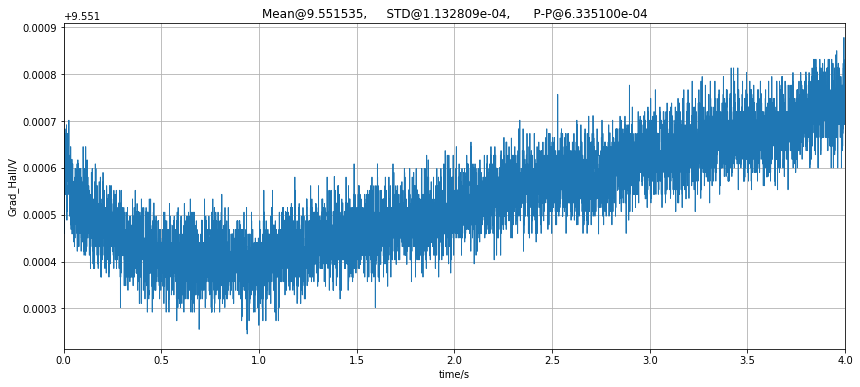

In [153]:
plt.figure(figsize=(14,6))
#plt.ylim(9.5512,9.55175)
plt.xlim(TimeList[0],TimeList[-1])
plt.title('Mean@%f,     STD@%e,      P-P@%e'%(Mean,Std,PpV))
plt.xlabel('time/s')
plt.ylabel('Grad_Hall/V')
plt.plot(TimeList,DataList,linewidth=0.9)
plt.grid(True)

In [160]:
grossfft=np.fft.rfft(DataList).real
fftresult=20*np.log10(abs(grossfft))-20*np.log10(np.amax(abs(grossfft)))

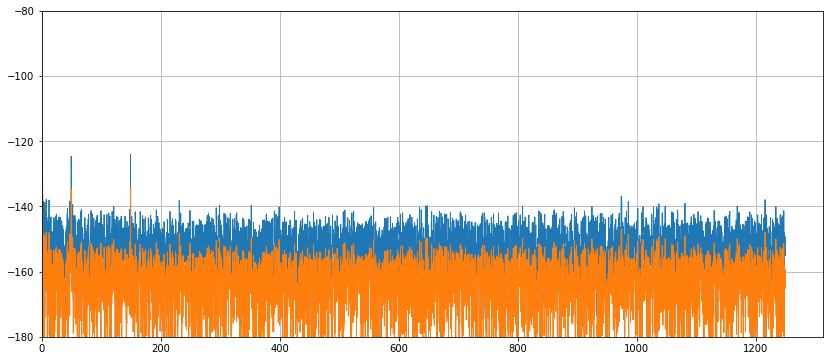

In [168]:
plt.figure(figsize=(14,6))
frerange=np.linspace(0,0.5/(TimeList[2]-TimeList[1]),len(fftresult))
plt.plot(frerange,fftresult,linewidth=0.9)
plt.plot(frerange,fftresult-10,linewidth=0.9)
plt.ylim(-180,-80)
plt.xlim(0,)
plt.grid(True)

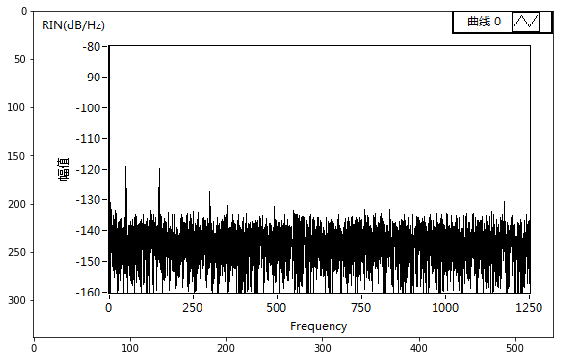

In [159]:
plt.figure(figsize=(15,6))
plt.imshow(np.array(Image.open('./FFTdata/04_Cap22uF_4s_spectrum.bmp')))